# <span style="color: rgb(204, 219, 219); font-weight: bold;">Project Summary</span>

![My Image](Images\istockphoto-485716154-612x612.jpg)

## <span style="color: rgb(122, 155, 79);font-weight: bold;">The Northampton Council Project:</span>


There has been a significant increase in sickness and hospital admissions in Northampton. In response to this concerning trend, the town council has decided to conduct diagnostic research to identify the underlying causes and develop effective mitigation strategies.  

### <span style="color: rgb(119, 209, 209); font-weight: bold;">Objectives:</span>


- What are the most common medical conditions in the town?  
- How can these medical conditions be mitigated across the city?  
  - Which gender experiences the most common medical conditions?  
  - Which age groups within this gender are most affected?  
  - Are certain blood types more prone to specific medical conditions?  
  - What factors contribute to **inconclusive** test results, and how can they be minimized in future diagnoses?  
  - Which medical conditions are classified as urgent and emergencies, allowing the council to address the issues at their root?  
- Which medical conditions require the longest hospital stays?  
- How are different hospitals specialized in treating specific medical conditions, and how can this information be used to implement effective mitigation strategies?  
- What are the test results associated with these medical conditions to better understand their nature?  



---

### <span style="color: rgb(119, 209, 209); font-weight: bold;">Digging Into the Data</span>

<img src="Images/premium_photo-1711238064361-7843b5b9bd9c.avif" alt="My Image" width="500" height="400">


#### <span style="color: rgb(82, 206, 206); font-weight: bold;">Data Preprocessing</span>


In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
from ipyleaflet import Map

In [2]:
df = pd.read_csv(r'Data\healthcare_dataset.csv')

In [3]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

_<span style="color: rgb(82, 206, 206); font-weight: bold;">From the above:</span>_

- The dataset has no null values
- The data entry is 55500 
- The data comprises of 14 column
- Seeing there are no ull cells or columns and the datatype of the columns are accurately classified

In [5]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

Drop Columns...

In [6]:
col_to_drop = ['Name', 'Doctor','Room Number']

df = df.drop(col_to_drop, axis=1)

Check for Unique Values

In [7]:
def unique_values (df, columns):
    unique_values = {}
    for col in columns:
        if col in df.columns:
            unique_values[col] = df[col].unique().tolist()
        else:
            unique_values[col] = "Column not found"
    return unique_values

cat_columns = ['Gender', 'Hospital', 'Blood Type','Medical Condition', 'Admission Type', 'Medication', 'Test Results', 'Insurance Provider']


unique = unique_values(df, cat_columns)

print(f'The unique values for each columns are: {unique}')

The unique values for each columns are: {'Gender': ['Male', 'Female'], 'Hospital': ['Sons and Miller', 'Kim Inc', 'Cook PLC', 'Hernandez Rogers and Vang,', 'White-White', 'Nunez-Humphrey', 'Group Middleton', 'Powell Robinson and Valdez,', 'Sons Rich and', 'Padilla-Walker', 'Schaefer-Porter', 'Lyons-Blair', 'Powers Miller, and Flores', 'Rivera-Gutierrez', 'Morris-Arellano', 'Cline-Williams', 'Cervantes-Wells', 'Torres, and Harrison Jones', 'Houston PLC', 'Hammond Ltd', 'Jones LLC', 'Williams-Davis', 'Clark-Mayo', 'and Sons Smith', 'Wilson Group', 'Garner-Bowman', 'Brown, and Jones Weaver', 'Serrano-Dixon', 'Gardner-Miller', 'Guerrero-Boone', 'Hart Ltd', 'Cruz-Santiago', 'Group Duncan', 'Lopez-Phillips', 'Poole Inc', 'Sons and Cox', 'LLC Martin', 'Espinoza-Stone', 'and Garcia Morris Cunningham,', 'Walton-Meyer', 'PLC Young', 'Meadows Group', 'and Howell Brooks, Rogers', 'and Mcclure White Boone,', 'Gates Brown, and Stuart', 'Group Armstrong', 'Ltd Schwartz', 'Nelson-Phillips', 'Knight an

In [8]:
df['Billing Amount'] = round(df['Billing Amount'], 0)


In [ ]:
# # Group by 'Discharge Year', 'Discharge Month', and 'Medical Condition' and count occurrences
# monthly_discharge_condition_counts = df.groupby(['Discharge Year', 'Discharge Month', 'Medical Condition']).size().unstack(fill_value=0)

# # Print or inspect the result
# print(monthly_discharge_condition_counts)


# ---# Group by 'Discharge Year' and 'Medical Condition' and count occurrences
# yearly_discharge_condition_counts = df.groupby(['Discharge Year', 'Medical Condition']).size().unstack(fill_value=0)

# # Print or inspect the result
# print(yearly_discharge_condition_counts)


In [ ]:
# # Query for data in a specific range (e.g., 2015-2020 for Cancer condition)
# cancer_in_range = yearly_condition_counts.loc[2015:2020, 'Cancer']

# # Print the results
# print(cancer_in_range)

 

# # Query for data in a specific range (e.g., 2015-2020 for Cancer condition)
# cancer_in_range = yearly_condition_counts.loc[2015:2020, 'Cancer']

# # Print the results
# print(cancer_in_range)


In [ ]:
# hospital_condition_counts = df.groupby([ 'Medical Condition', 'Hospital']).size().reset_index(name='Count')

# hospital_condition_counts = hospital_condition_counts[hospital_condition_counts['Count']== 1]

# hospital_condition_counts



# import pandas as pd

# # Group by 'Hospital' and count how many times it appears with Count == 1
# hospital_frequencies = hospital_condition_counts.groupby(['Hospital', 'Medical Condition']).size().reset_index(name='Total Count')

# # Sort by 'Total Count' in descending order
# top_hospitals = hospital_frequencies.sort_values(by='Total Count', ascending=False)

# # Display the top hospitals
# print(top_hospitals)

# import pandas as pd

# # Group by 'Hospital' and count how many times it appears with Count == 1
# hospital_frequencies = hospital_condition_counts.groupby('Hospital').size().reset_index(name='Total Count')

# # Sort by 'Total Count' in descending order
# top_hospitals = hospital_frequencies.sort_values(by='Total Count', ascending=False)

# # Display the top hospitals
# print(top_hospitals)



# import pandas as pd

# # Count occurrences of each medical condition per hospital
# hospital_condition_counts = df.groupby(['Hospital', 'Medical Condition']).size().reset_index(name='Count')

# # Ensure each hospital is counted for the most frequent medical condition it treats
# most_common_condition = hospital_condition_counts.loc[
#     hospital_condition_counts.groupby('Hospital')['Count'].idxmax()
# ]

# # (Fix) **Do NOT filter for Count == 1**, as it removes valid hospitals
# # Instead, just get the top hospital for each medical condition
# top_hospital_per_condition = most_common_condition.loc[
#     most_common_condition.groupby('Medical Condition')['Count'].idxmax()
# ]

# # Rename columns for clarity
# top_hospital_per_condition.rename(columns={'Count': 'Total Count'}, inplace=True)

# # Display the result
# print(top_hospital_per_condition)

# # Count occurrences of each medical condition per hospital
# hospital_condition_counts = df.groupby(['Hospital', 'Medical Condition']).size().reset_index(name='Count')

# # Aggregate counts per hospital, getting the sum of all medical conditions for each hospital
# hospital_condition_aggregated = hospital_condition_counts.groupby('Hospital')['Count'].sum().reset_index(name='Total Count')

# # Sort the hospitals by the total count in descending order to find those with the highest aggregated counts
# highest_hospital_counts = hospital_condition_aggregated.sort_values(by='Total Count', ascending=False)

# # Print the hospitals with the highest aggregated count of 1 for medical conditions
# print(highest_hospital_counts)




In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Sample Data (assuming the data is already loaded in 'df')
# # Step 1: Count occurrences of each medical condition per hospital
# hospital_condition_counts = df.groupby(['Hospital', 'Medical Condition']).size().reset_index(name='Count')

# # Step 2: Get the hospital with the most cases per condition
# most_common_condition = hospital_condition_counts.loc[
#     hospital_condition_counts.groupby('Medical Condition')['Count'].idxmax()
# ]

# # Step 3: Create a bar chart showing the hospital with the highest count for each medical condition
# plt.figure(figsize=(12, 6))
# plt.bar(most_common_condition['Medical Condition'], most_common_condition['Count'], color='skyblue')

# # Add labels and title
# plt.title('Hospitals Specializing in Specific Medical Conditions', fontsize=14, fontweight='bold')
# plt.xlabel('Medical Condition', fontsize=14)
# plt.ylabel('Maximum Count of Treatments', fontsize=14)
# plt.xticks(rotation=45, ha='right', fontsize=12)
# plt.yticks(fontsize=12)

# # Add the hospital names on top of the bars
# for i, condition in enumerate(most_common_condition['Medical Condition']):
#     plt.text(i, most_common_condition['Count'].iloc[i] + 1, most_common_condition['Hospital'].iloc[i],
#              ha='center', va='bottom', fontsize=10, fontweight='bold')

# # Adjust layout for better spacing
# plt.tight_layout()

# # Show plot
# plt.show()


In [ ]:
# # Select specific condition (e.g., 'Cancer') and plot by month
# monthly_cancer_counts = monthly_condition_counts.loc[:, 'Cancer']  # Filter by condition

# # Plot for a specific condition by month (across years)
# monthly_cancer_counts.plot(kind='line', marker='o', figsize=(12, 6))
# plt.title('Number of Cancer Admissions by Month Over Time')
# plt.xlabel('Year-Month')
# plt.ylabel('Count')
# plt.grid(True)
# plt.show()



# import matplotlib.pyplot as plt

# # Select a specific medical condition, e.g., 'Cancer'
# cancer_counts = yearly_condition_counts.loc[:, 'Cancer']  # Assuming 'Cancer' is a condition in your data

# # Plot the time series (counts over years)
# plt.figure(figsize=(10, 6))
# cancer_counts.plot(kind='line', marker='o', color='b')
# plt.title('Number of Cancer Admissions Over Time')
# plt.xlabel('Year')
# plt.ylabel('Count')
# plt.grid(True)
# plt.show()


---
Question 1



- What are the most common medical conditions in the town?  



In [9]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn as sns

@interact(hue=['Gender', 'Blood Type', 'Test Results'])
def plot(hue):
    plt.figure(figsize=(20, 11))  # Increased figure size for better spacing
    ax = sns.countplot(data=df, x='Medical Condition', hue=hue)

    # Add count labels to each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, fontweight='bold', color='black', 
                    rotation=70)  # Rotate numbers by 45 degrees
        
           # Make X and Y labels bold
    ax.set_xlabel("Medical Condition", fontsize=12, fontweight='bold')  # Bold X-axis label
    ax.set_ylabel("Count", fontsize=12, fontweight='bold')  # Bold Y-axis label


    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    ax.legend(title=hue, loc='upper right', bbox_to_anchor=(1.3, 1))  # Adjust legend position
    plt.tight_layout()  # Ensures everything fits without overlapping
    plt.show()

interactive(children=(Dropdown(description='hue', options=('Gender', 'Blood Type', 'Test Results'), value='Gen…



<span style="color: rgb(82, 206, 206); font-weight: bold;">From the above:</span>

- **Gender**:
    - Although the numbers are quite close, there are **more females** than males who **are obese**. This could be due to _hormonal changes.The Estrogen hormone mainly produced in women encourages fat storage, especially in areas like the **thighs, hips, and lower abdomen**. In contrast, the testosterone hormone in men helps build more muscle mass, which leads to an increased metabolic rate, subsequently burning more fat. In addition to the gentical factors- other factors like lifestyles, Pregnancy, menopause, and conditions like PCOS may be the causla factors of the leading number of obesity in women.
    -  **Diabetes is more prevalent among men**, this amy be due to many factors. While men are at a higher risk for type 2 diabetes, lifestyle factors such as high-calorie diets, alcohol consumption, and sedentary behavior can contribute to this riskpossibly due to higher alcohol consumption and intake of [increasing ultra-processed foods in town](https://www.tripadvisor.co.uk/Restaurants-g186349-c10646-Northampton_Northamptonshire_England.html.)


    -  **Asthma is more prevalent among men**, potentially linked to workplace chemical pollutants. According to D&B, [there are almost 1,000 factories in Northampton](https://www.dnb.com/business-directory/company-information.manufacturing.gb.na.northampton.html), with 80% of the workers being male.
    - **Hypertension** is notably higher among men, potentially due to workplace stress from factory environments and hazardous exposures.
    - An old **[survey](https://www.northamptonchron.co.uk/news/people/more-than-6000-lone-parent-families-in-northampton-under-strain-during-coronavirus-lockdown-2518232?utm_source=chatgpt.com)** in Northampton showed there may be more **stay-at-home moms**. This could be on eof the causal factors for athristis in women. Another **[study](https://academic.oup.com/rheumatology/article-abstract/57/2/213/3192222?redirectedFrom=fulltext&login=false)** shows there may be a link between limited physical activity and athristis.

**Summary**: Women's health issues include obesity and arthritis, often influenced by limited physical activity. Men's health concerns encompass alcohol consumption, chemical exposure at work, asthma, and hypertension. Addressing these factors through education on proper nutrition and lifestyle changes is crucial to reduce the current patient numbers, which are approaching 5,000.

- **Blood Types**:
    - Regarding cancer, [research shows that blood groups AB and A](https://bmccancer.biomedcentral.com/articles/10.1186/s12885-019-5355-4) are more susceptible to gastric cancer.
    - The data above shows the highest cancer rates per blood group are AB negative and A positive. While this data isn't directly linked to the previous research, it suggests a possible correlation.
    - Regarding **obesity**, it's evident that genes and lifestyle habits play a role. However, **individuals with sickle cell disease** are generally not obese due to extreme energy expenditure required to manage the condition, as sickle cell disease involves increased metabolism and higher energy demands.
    - *While there are [studies on blood types and obesity](https://pesquisa.bvsalud.org/gim/resource/fr/sea-218705?utm_source=chatgpt.com) , the relationship between blood group B and obesity remains inconclusive.”*


    - Regarding **diabetes**, [research indicates](https://pubmed.ncbi.nlm.nih.gov/26875891/) that women with blood group B positive (B+) are 35% more likely to develop type 2 diabetes than those with blood group O-. Women with blood group AB+ have a 26% higher risk, those with A- have a 22% higher risk, and those with A+ have a 17% increased risk.
    - Dr. Fagherazzi's research supports a strong relationship between blood group and diabetes risk, with participants with blood type O having a lower risk of developing type 2 diabetes. 

**Test Results and Medical Conditions**:

- Data suggest prioritizing arthritis and cancer based on abnormal and inconclusive results.
- Asthma and hypertension have more normal results, followed by inconclusive results.
- Obesity and diabetes show a balance between abnormal and normal results.


Depending on medical preferences, arthritis and cancer should be prioritized. If abnormal results precede inconclusive ones, obesity and diabetes should follow.


---

In [10]:
# CODE ROUGH NOTE TO STUDY AFTERWARDS
# @interact(hue=['Gender', 'Blood Type', 'Test Results'])
# def plot(hue):
#     plt.figure(figsize=(8, 5))
#     ax = sns.countplot(data=df, x='Medical Condition', hue=hue)
#     plt.xticks(rotation=45)  # Rotate x-axis labels if needed
#     ax.legend(title=hue, loc='upper right', bbox_to_anchor=(1.3, 1))  # Adjust position
#     plt.show()


---

Question 2

- How can these medical conditions be mitigated across the city?   

    Which gender experiences the most common medical conditions?  

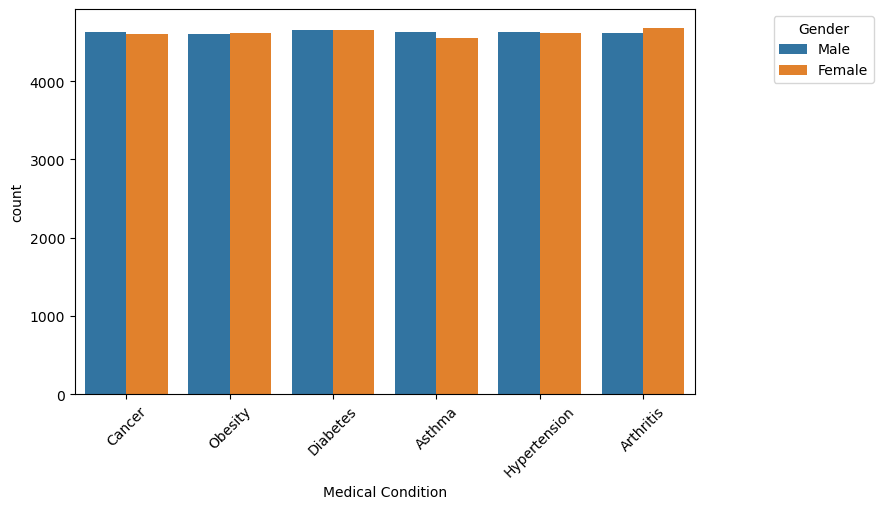

In [11]:
plt.figure(figsize=(8, 5))

# Create the Seaborn countplot
ax = sns.countplot(data=df, x='Medical Condition', hue='Gender')

plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Move the legend to the upper right outside the plot
ax.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()


        Which age groups within this gender are most affected?  

In [12]:
df['Age']

0        30
1        62
2        76
3        28
4        43
         ..
55495    42
55496    61
55497    38
55498    43
55499    53
Name: Age, Length: 55500, dtype: int64

In [13]:
import pandas as pd

# Ensure Age is cleaned
df['Age'] = df['Age'].astype(str).str.strip()  # Remove spaces
df['Age'] = df['Age'].replace('', None)  # Convert empty strings to None
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Convert to numeric

# Define bins and labels
bins = [13, 35, 55, 75, 89, float('inf')]  # Age ranges
labels = ['Young Adults', 'Adults', 'Middle-Aged', 'Seniors', 'Elderly']  # Category labels

# Apply pd.cut() only on valid numeric values
df['Age Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Convert categories to string and fill NaN values
df['Age Category'] = df['Age Category'].astype(str).fillna('Unknown')

# Display results
print(df[['Age', 'Age Category']])


       Age  Age Category
0       30  Young Adults
1       62   Middle-Aged
2       76       Seniors
3       28  Young Adults
4       43        Adults
...    ...           ...
55495   42        Adults
55496   61   Middle-Aged
55497   38        Adults
55498   43        Adults
55499   53        Adults

[55500 rows x 2 columns]


In [14]:
df.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Discharge Date', 'Medication', 'Test Results', 'Age Category'],
      dtype='object')

exerciose for adulys
balanced diet education fopr adults


to combat obsesity and athristis

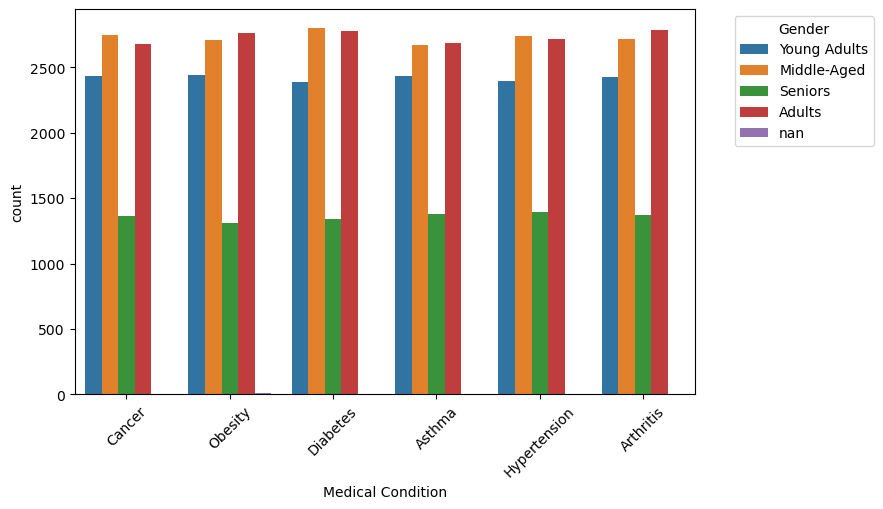

In [15]:
plt.figure(figsize=(8, 5))

# Create the Seaborn countplot
ax = sns.countplot(data=df, x='Medical Condition', hue='Age Category')

plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Move the legend to the upper right outside the plot
ax.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()


        Are certain blood types more prone to specific medical conditions?  

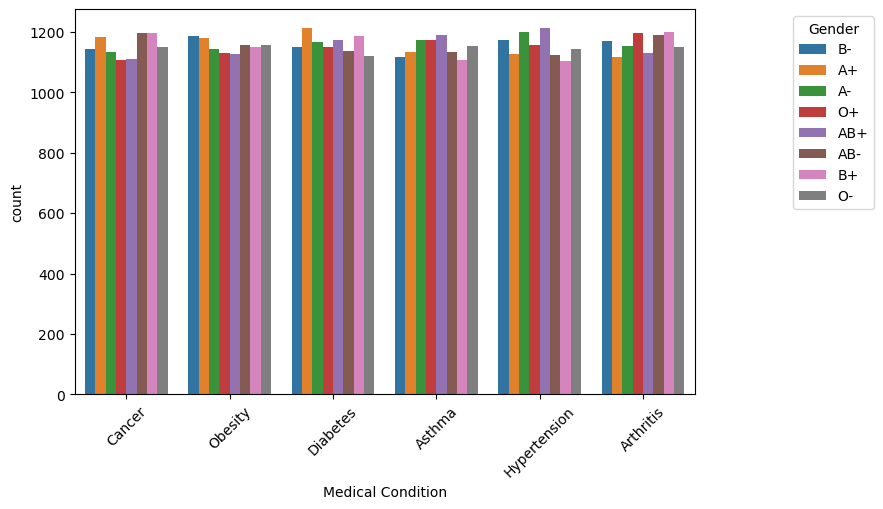

In [16]:
plt.figure(figsize=(8, 5))

# Create the Seaborn countplot
ax = sns.countplot(data=df, x='Medical Condition', hue='Blood Type')

plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Move the legend to the upper right outside the plot
ax.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()


        What factors contribute to **inconclusive or abnormal** test results, and how can they be minimized in future diagnoses?  


answered above

In medical diagnostics, test results are typically categorized as **normal**, **abnormal**, or **inconclusive**. Understanding the factors that contribute to inconclusive and abnormal results is essential for accurate diagnosis and effective patient management.

**Factors Contributing to Inconclusive Test Results:**

1. **Obesity and Inflammation Markers:**
   - Obesity can influence levels of inflammation markers such as C-reactive protein (CRP) and erythrocyte sedimentation rate (ESR). Higher BMI has been associated with increased CRP and ESR levels, which may confound the assessment of conditions like rheumatoid arthritis. This overlap can lead to diagnostic challenges, making results inconclusive. citeturn0search3

2. **Asthma Diagnosis in Overweight Individuals:**
   - Obesity and asthma both cause breathlessness, leading to a risk of misdiagnosis. Studies have found that a significant proportion of overweight individuals diagnosed with asthma may not exhibit bronchial hyperresponsiveness, suggesting possible misclassification. citeturn0search2

3. **Sample Handling and Laboratory Errors:**
   - Pre-analytical factors such as delays in processing, temperature variations, hemolysis, icterus, lipemia, incorrect sample sites, and cross-reactivity can lead to spurious test results. These issues can cause results to be flagged as inconclusive or abnormal. citeturn0search1

**Addressing Abnormal and Inconclusive Test Results:**

1. **Comprehensive Patient Evaluation:**
   - A thorough clinical assessment, including patient history, physical examination, and consideration of comorbidities like obesity, is crucial. This helps contextualize test results and aids in distinguishing between true pathology and confounding factors.

2. **Repeat Testing and Alternative Methods:**
   - If initial results are inconclusive or abnormal, repeating tests or employing alternative diagnostic methods can provide clarity. For instance, using more specific biomarkers or advanced imaging techniques may help resolve uncertainties.

3. **Multidisciplinary Collaboration:**
   - Engaging specialists such as endocrinologists, rheumatologists, or pulmonologists can offer additional insights, especially when results are influenced by complex factors like obesity.

4. **Patient Education and Lifestyle Modifications:**
   - Educating patients about the impact of lifestyle factors, including diet and physical activity, can address underlying issues contributing to abnormal test results. For example, weight management may reduce inflammation markers, leading to more accurate assessments.

By considering these factors and approaches, healthcare providers can enhance the accuracy of diagnoses and tailor interventions appropriately. 

In [17]:


@interact(hue=['Gender', 'Blood Type'])
def plot(hue):
    plt.figure(figsize=(8, 5))

    # Filter only rows where 'Test Results' is 'Inconclusive'
    filtered_df = df[df['Test Results'] == 'Inconclusive']

    # Create the countplot
    ax = sns.countplot(data=filtered_df, x='Medical Condition', hue=hue)

    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    ax.legend(title=hue, loc='upper right', bbox_to_anchor=(1.3, 1))  # Adjust legend position
    plt.show()


interactive(children=(Dropdown(description='hue', options=('Gender', 'Blood Type'), value='Gender'), Output())…

        Which medial condition are classified as urgent and emergencies, allowing the council to address the issues at their root? 

        -All are

In [18]:

@interact(hue=['Gender', 'Blood Type'])
def plot(hue):
    plt.figure(figsize=(8, 5))

    # Correct filtering: Select only 'Urgent' and 'Emergency' cases
    filtered_df = df[df['Admission Type'].isin(['Urgent', 'Emergency'])]

    # Create the countplot
    ax = sns.countplot(data=filtered_df, x='Medical Condition', hue=hue)

    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    ax.legend(title=hue, loc='upper right', bbox_to_anchor=(1.3, 1))  # Adjust legend position
    plt.show()


interactive(children=(Dropdown(description='hue', options=('Gender', 'Blood Type'), value='Gender'), Output())…

<span style="color: rgb(82, 206, 206); font-weight: bold;">Summary of Findings:</span>

- Analysis indicates that both the **35-54** _(adult) and **55-74** _(middle-aged)_ age groups exhibit the highest prevalence of various medical conditions. Notably, **diabetes** and **arthritis** are most prevalent among these demographics.

**Supporting Data:**

- Diabetes Prevalence:
  - In England, diabetes affects approximately **8.6%** of individuals aged 16 and over. Prevalence increases with age, reaching **23.8%** in those aged 75 and above. citeturn0search8

- Arthritis Prevalence:
  - Arthritis affects **56%** of women and **40%** of men aged 75 to 79 in England. citeturn0search3


_These statistics underscore the significant impact of diabetes and arthritis on the aging population, highlighting the need for targeted healthcare strategies._

----

_Image_

Question 3

  
- Which medical conditions require the longest hospital stays?  

In [19]:
import pandas as pd

# Convert to datetime format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], errors='coerce')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], errors='coerce')

# Extract Year and Month as strings
df['Admission Year-Month'] = df['Date of Admission'].dt.strftime('%Y-%m')
df['Discharge Year-Month'] = df['Discharge Date'].dt.strftime('%Y-%m')

# Calculate number of days between Discharge and Admission
df['Hospital Stay (Days)'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Display results
print(df[['Admission Year-Month', 'Discharge Year-Month', 'Hospital Stay (Days)']])


      Admission Year-Month Discharge Year-Month  Hospital Stay (Days)
0                  2024-01              2024-02                     2
1                  2019-08              2019-08                     6
2                  2022-09              2022-10                    15
3                  2020-11              2020-12                    30
4                  2022-09              2022-10                    20
...                    ...                  ...                   ...
55495              2020-08              2020-09                    30
55496              2020-01              2020-02                     9
55497              2020-07              2020-08                    28
55498              2019-05              2019-05                     6
55499              2024-04              2024-04                    27

[55500 rows x 3 columns]


In [20]:
df

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Age Category,Admission Year-Month,Discharge Year-Month,Hospital Stay (Days)
0,30,Male,B-,Cancer,2024-01-31,Sons and Miller,Blue Cross,18856.0,Urgent,2024-02-02,Paracetamol,Normal,Young Adults,2024-01,2024-02,2
1,62,Male,A+,Obesity,2019-08-20,Kim Inc,Medicare,33643.0,Emergency,2019-08-26,Ibuprofen,Inconclusive,Middle-Aged,2019-08,2019-08,6
2,76,Female,A-,Obesity,2022-09-22,Cook PLC,Aetna,27955.0,Emergency,2022-10-07,Aspirin,Normal,Seniors,2022-09,2022-10,15
3,28,Female,O+,Diabetes,2020-11-18,"Hernandez Rogers and Vang,",Medicare,37910.0,Elective,2020-12-18,Ibuprofen,Abnormal,Young Adults,2020-11,2020-12,30
4,43,Female,AB+,Cancer,2022-09-19,White-White,Aetna,14238.0,Urgent,2022-10-09,Penicillin,Abnormal,Adults,2022-09,2022-10,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,2020-08-16,Jones-Thompson,Blue Cross,2651.0,Elective,2020-09-15,Penicillin,Abnormal,Adults,2020-08,2020-09,30
55496,61,Female,AB-,Obesity,2020-01-23,Tucker-Moyer,Cigna,31458.0,Elective,2020-02-01,Aspirin,Normal,Middle-Aged,2020-01,2020-02,9
55497,38,Female,B+,Hypertension,2020-07-13,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27621.0,Urgent,2020-08-10,Ibuprofen,Abnormal,Adults,2020-07,2020-08,28
55498,43,Male,O-,Arthritis,2019-05-25,"Jackson Todd and Castro,",Medicare,32451.0,Elective,2019-05-31,Ibuprofen,Abnormal,Adults,2019-05,2019-05,6


In [21]:
#CODE TO KEEP AND REVIST FOR STUDY PURPOSE
# # Create the bar plot
# ax = sns.barplot(
#     data=df,
#     x='Medical Condition',
#     y='Hospital Stay (Days)',
#     ci=None
# )

# # Annotate each bar
# for p in ax.patches:
#     ax.annotate(
#         format(p.get_height(), '.1f'),
#         (p.get_x() + p.get_width() / 2., p.get_height()),
#         ha='center', va='center',
#         xytext=(0, 9),  # Adjust vertical position
#         textcoords='offset points',
#         rotation=90  # Rotate text vertically
#     )

# plt.show()
# -----2

# ax = sns.barplot(
#     data=df,
#     x='Medical Condition',
#     y='Hospital Stay (Days)',
#     ci=None,
#     width=0.6  # Narrower bars
# )

# # Annotate each bar
# for p in ax.patches:
#     ax.annotate(
#         format(p.get_height(), '.1f'),
#         (p.get_x() + p.get_width() / 2., p.get_height()),
#         ha='center', va='center',
#         xytext=(0, 9),  # Adjust vertical position
#         textcoords='offset points',
#         rotation=90  # Rotate text vertically
#     )

# plt.show()


# ---3
# # Create the stacked histogram
# ax = sns.histplot(data=df, x='Hospital Stay (Days)', hue='Medical Condition', multiple='stack')

# # Rotate x-axis labels if needed
# plt.xticks(rotation=90)

# # Iterate over the patches to add annotations
# for p in ax.patches:
#     height = p.get_height()
#     if height > 0:  # Only annotate bars with a positive height
#         ax.annotate(f'{int(height)}',
#                     (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),
#                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 0),
#                     textcoords='offset points')

# # Adjust legend position
# # ax.legend(title='Medical Condition', loc='upper right', bbox_to_anchor=(1.3, 1))



# # Use Seaborn's move_legend function to position the legend
# sns.move_legend(ax, "upper right", bbox_to_anchor=(1.2, 1))

# plt.show()


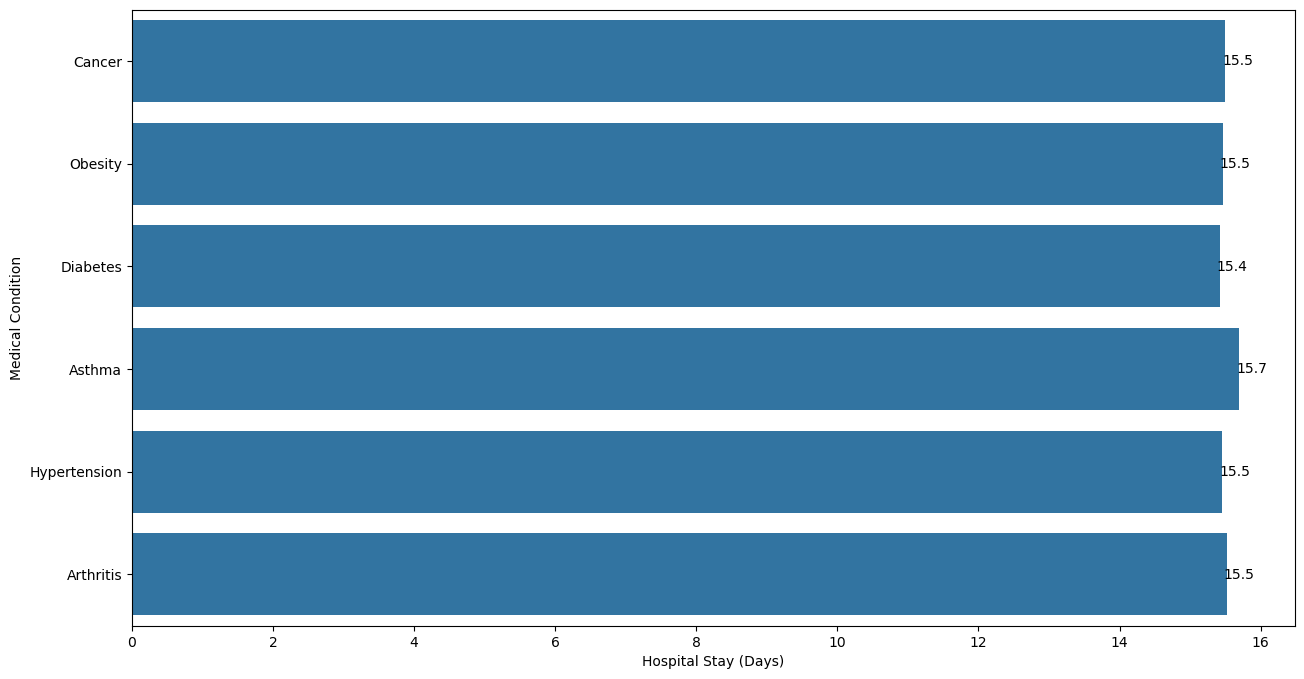

In [22]:
plt.figure(figsize=(15, 8))

# Create the horizontal bar plot
ax = sns.barplot(
    data=df,
    y='Medical Condition',
    x='Hospital Stay (Days)',
    errorbar=None
)

# Annotate each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_width(), '.1f'),
        (p.get_width(), p.get_y() + p.get_height() / 2.),
        ha='center', va='center',
        xytext=(9, 0),  # Adjust horizontal position
        textcoords='offset points'
    )

plt.show()


<span style="color: rgb(82, 206, 206); font-weight: bold;">From the above:</span>

- From the graph above, the data shows that Asthma has the highest average hospital stay, with an average of 15.7 days. On the other hand, Diabetes has the lowest hospital duration at 15.4 days.
- Hospitals treating asthma more frequently may be given higher priority in terms of budget allocation. This is because asthma patients tend to require longer hospitalization, which directly impacts hospital resources. 

---

Questiion 4

- How are different hospitals specialized in treating specific medical conditions, and how can this information be used to implement effective mitigation strategies?  


In [23]:
df['Hospital'].nunique()

39876

In [24]:

# Count occurrences of each medical condition per hospital
hospital_condition_counts = df.groupby(['Hospital', 'Medical Condition']).size().reset_index(name='Count')

# Get the most common condition per hospital
most_common_condition = hospital_condition_counts.loc[
    hospital_condition_counts.groupby('Hospital')['Count'].idxmax()
]

most_common_condition = most_common_condition[most_common_condition['Count'] == 1]



print(most_common_condition)


                            Hospital Medical Condition  Count
0                         Abbott Inc         Arthritis      1
1                         Abbott Ltd         Arthritis      1
2         Abbott Moore and Williams,           Obesity      1
3      Abbott and Thompson, Sullivan      Hypertension      1
5       Abbott, Vazquez Bautista and           Obesity      1
...                              ...               ...    ...
46179             and Zimmerman Sons           Obesity      1
46180      and Zuniga Davis Carlson,          Diabetes      1
46181   and Zuniga Francis Peterson,          Diabetes      1
46182                and Zuniga Sons      Hypertension      1
46183     and Zuniga Thompson, Blake         Arthritis      1

[33751 rows x 3 columns]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure most_common_condition is already calculated with counts of 1
# Create a bar plot for hospitals with the highest counts of 1 per medical condition
plt.figure(figsize=(12, 6))
sns.barplot(data=most_common_condition, x='Hospital', y='Count', hue='Medical Condition')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Hospital')
plt.ylabel('Count (Always 1)')
plt.title('Hospitals with the Most Common Condition (Count = 1) per Medical Condition')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Hospital and Medical Condition to get the counts
hospital_condition_counts = df.groupby(['Hospital', 'Medical Condition']).size().reset_index(name='Count')

# Find the most common condition per hospital (highest count)
most_common_condition = hospital_condition_counts.loc[
    hospital_condition_counts.groupby('Hospital')['Count'].idxmax()
]

# Filter out the rows where the highest count is 1
most_common_condition_highest = most_common_condition[most_common_condition['Count'] == 1]

# Plot the aggregated highest count for each hospital
plt.figure(figsize=(12, 6))
sns.barplot(data=most_common_condition_highest, x='Hospital', y='Count', hue='Medical Condition')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set labels and title
plt.xlabel('Hospital')
plt.ylabel('Count (Highest Count = 1)')
plt.title('Hospitals with the Highest Count of 1 per Medical Condition')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Count occurrences of each medical condition per hospital
hospital_condition_counts = df.groupby(['Hospital', 'Medical Condition']).size().reset_index(name='Count')

# Aggregate counts per hospital, getting the sum of all medical conditions for each hospital
hospital_condition_aggregated = hospital_condition_counts.groupby('Hospital')['Count'].sum().reset_index(name='Total Count')

# Sort the hospitals by the total count in descending order to find those with the highest aggregated counts
highest_hospital_counts = hospital_condition_aggregated.sort_values(by='Total Count', ascending=False)

# Print the hospitals with the highest aggregated count of 1 for medical conditions
print(highest_hospital_counts)


In [62]:
print(type(most_common_condition.dtypes))

<class 'pandas.core.series.Series'>


In [63]:
df_sub = pd.DataFrame(most_common_condition)


print(df_sub)

                            Hospital Medical Condition  Count
0                         Abbott Inc         Arthritis      1
1                         Abbott Ltd         Arthritis      1
2         Abbott Moore and Williams,           Obesity      1
3      Abbott and Thompson, Sullivan      Hypertension      1
5       Abbott, Vazquez Bautista and           Obesity      1
...                              ...               ...    ...
46179             and Zimmerman Sons           Obesity      1
46180      and Zuniga Davis Carlson,          Diabetes      1
46181   and Zuniga Francis Peterson,          Diabetes      1
46182                and Zuniga Sons      Hypertension      1
46183     and Zuniga Thompson, Blake         Arthritis      1

[33751 rows x 3 columns]


In [64]:
print(type(most_common_condition))


<class 'pandas.core.frame.DataFrame'>


In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming df_sub is your DataFrame
# # Step 1: Group by 'Hospital' and 'Medical Condition' to sum the 'Count'
# df_grouped = df_sub.groupby(['Hospital', 'Medical Condition'], as_index=False)['Count'].agg('sum')

# # Step 2: Filter for the top N medical conditions (e.g., top 10)
# top_conditions = df_grouped.groupby('Medical Condition')['Count'].sum().nlargest(10).index
# df_filtered = df_grouped[df_grouped['Medical Condition'].isin(top_conditions)]

# # Step 3: Create the barplot with the filtered data using sns.barplot
# plt.figure(figsize=(10, 6))
# sns.barplot(data=df_filtered, x='Medical Condition', y='Count', hue='Hospital')

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45)

# # Display the plot
# plt.title("Hospital with Highest Count of Medical Conditions")
# plt.show()


C:\Users\Teni\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 846x707052 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

Question 5

- What are the test results associated with these medical conditions to better understand their nature? 


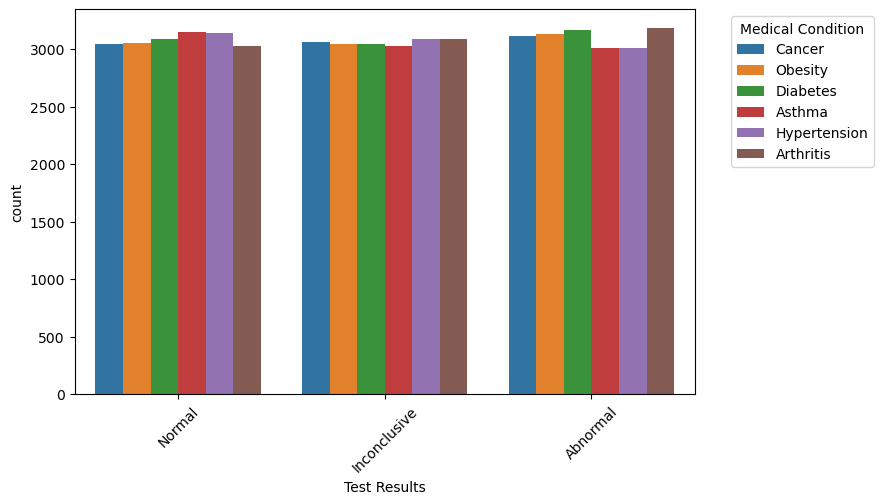

In [33]:

plt.figure(figsize=(8, 5))


# Create the countplot
ax = sns.countplot(data=df, x='Test Results', hue='Medical Condition')

plt.xticks(rotation=45)  # Rotate x-axis labels if needed
ax.legend(title='Medical Condition', loc='upper right', bbox_to_anchor=(1.3, 1))  # Adjust legend position
plt.show()


<span style="color: rgb(82, 206, 206); font-weight: bold;">From the above:</span>


- From the graph above, the data reveals that **Arthritis** has the highest number of abnormal test results, followed by **Diabetes**. On the other hand, **Asthma** and **Hypertension** seem to have the most normal test results, which could indicate that these conditions are being effectively managed. Given the high number of normal results, it's likely that medical interventions or resources are in place to assist in the diagnosis and treatment, leading to more favorable outcomes for these conditions.

- Furthermore, **Hypertension** and **Arthritis** are the most frequent medical conditions with inconclusive test results, followed by **Cancer**. This suggests that while **Cancer** is still a significant concern in terms of inconclusive results, its frequency in abnormal results is slightly less when compared to **Obesity**, which ranks higher in this category.

- Notably, **Asthma** seems to have the least number of abnormal and inconclusive test results, which is a positive sign. This suggests that current treatments and diagnostic protocols are working well in managing and detecting asthma, resulting in more accurate and consistent test results.

- **Obesity** ranks higher than **Cancer** in terms of abnormal test results, further emphasizing the importance of addressing obesity as a critical health issue. **Cancer**, though still present in abnormal test results, does not appear to be the leading cause when compared to other conditions like **Obesity**.

- As for inconclusive results, **Hypertension** and **Arthritis** continue to be the top two, indicating that further investigations and refined diagnostic criteria may be necessary for these conditions. The high rate of inconclusive results may suggest the need for more precise diagnostic tools or better-defined treatment guidelines for these medical conditions.


---




### Recommendations:
1. **Increase focus on Cancer Diagnosis**: Given that Cancer consistently ranks high in both abnormal and inconclusive test results, there should be a focus on improving diagnostic accuracy, possibly through the use of advanced testing methods or second opinion reviews. This could reduce the number of inconclusive and abnormal results.

2. **Improve Treatment and Diagnostic Protocols for Hypertension and Arthritis**: Since these conditions also appear frequently in inconclusive results, a review of current treatment protocols may be necessary. Additional research into better diagnostic methods could help reduce these inconclusive cases.

3. **Maintain Effective Asthma Management**: Since **Asthma** has the least abnormal and inconclusive results, it would be beneficial to maintain or expand the current strategies that are working. This could include continuing public health education campaigns, improving access to medications, and ensuring that diagnostic tools are used effectively.

4. **Address Obesity More Aggressively**: **Obesity** appears as a more significant contributor to abnormal test results than **Cancer**, indicating that more intensive efforts should be made to tackle obesity. Targeted programs that focus on diet, exercise, and preventive care should be expanded to reduce its impact on public health.

5. **Focus on Data Accuracy**: Finally, as high numbers of inconclusive results are observed in several conditions, further efforts should be made to improve the accuracy of test results. This could involve investing in more reliable testing technologies or refining current methods to reduce the occurrence of inconclusive results across conditions.



In [108]:
# from sklearn.preprocessing import LabelEncoder

# def label_encode(df, columns):
#     le_dict = {}  # Store mappings for reference
#     for col in columns:
#         le = LabelEncoder()
#         df[col] = le.fit_transform(df[col].astype(str))
        
#         # Create a dictionary that maps the encoded number to the label
#         le_dict[col] = dict(zip(le.classes_, range(len(le.classes_))))  # Number -> Label mapping
    
#     return df, le_dict

# # Apply label encoding
# df, label_mappings = label_encode(df, cat_columns)
# 9
# # Print the mappings
# for col, mapping in label_mappings.items():
#     print(f"Label Mapping for {col}: {mapping}")


Conclusion

_Image_